# Machine Learning Project on "Heart Disease" in Multiple Disease Data

# Visualizing heart disease risk, with interpretability of key contributing factors.

C:\Users\MASHALLAH\AppData\Local\Temp\ipykernel_11740\2918234169.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[column].fillna(filtered_data[column].mode()[0], inplace=True)
C:\Users\MASHALLAH\AppData\Local\Temp\ipykernel_11740\2918234169.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[column].fillna(filtered_data[column].median(), inplace=True)


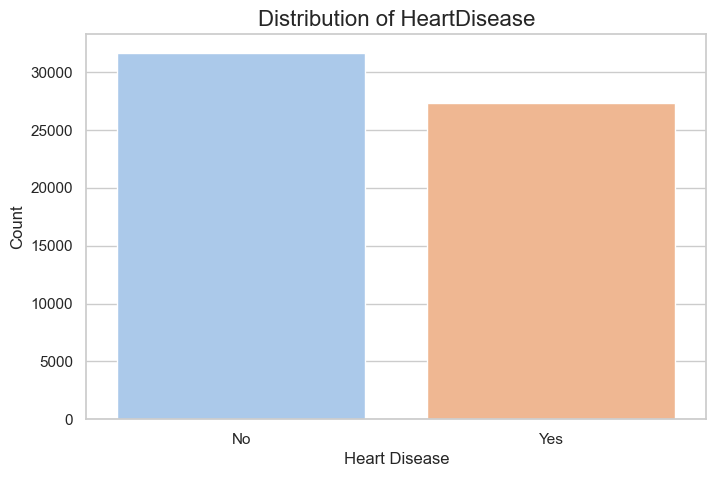

C:\Users\MASHALLAH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


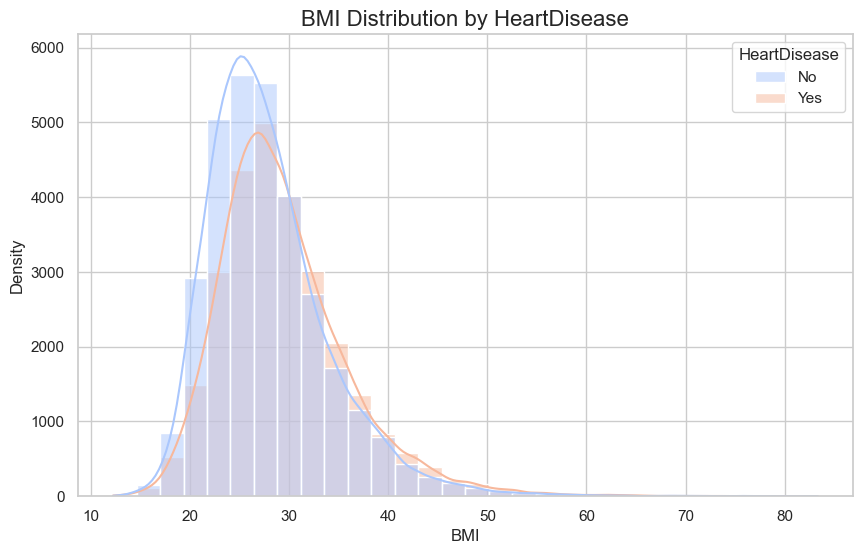

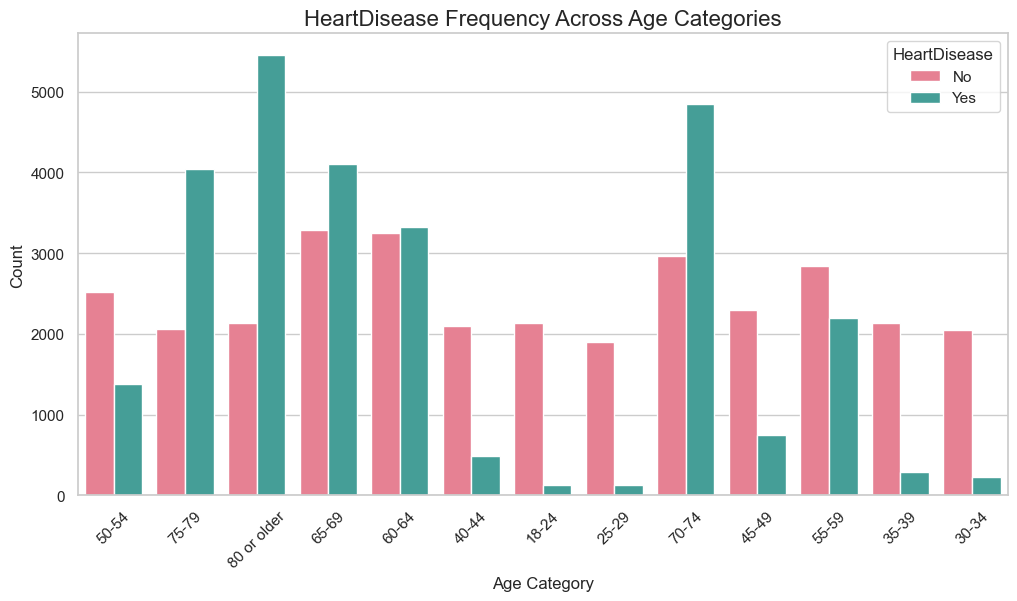

C:\Users\MASHALLAH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


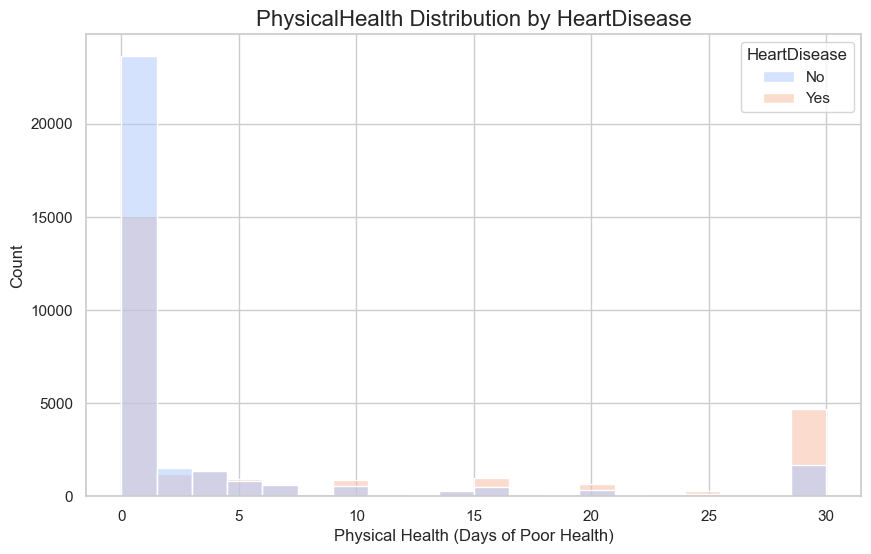

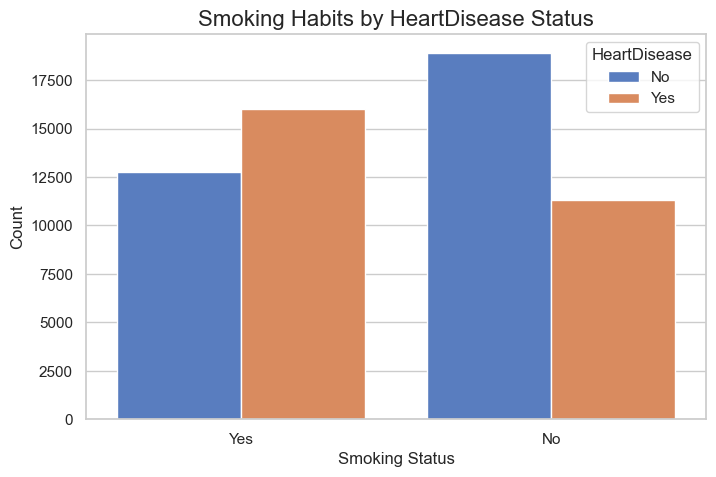

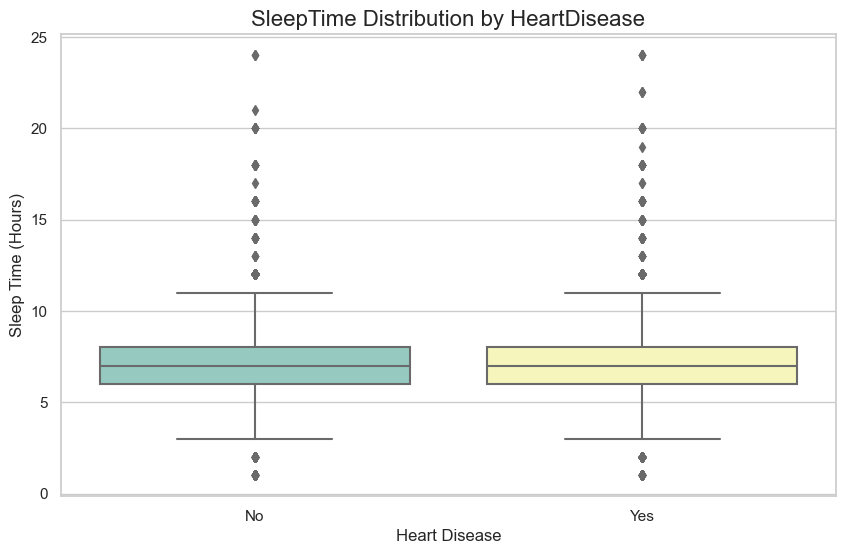

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = r'Multiple Disease Data.csv'
data = pd.read_csv(file_path)

columns_to_keep = [
    "HeartDisease", "BMI", "Smoking", "AlcoholDrinking", "Stroke", "PhysicalHealth",
    "MentalHealth", "DiffWalking", "Sex", "AgeCategory", "Race", "Diabetic",
    "PhysicalActivity", "GenHealth", "SleepTime"
]
filtered_data = data[columns_to_keep]

# Handle missing values by imputing with mode (categorical) or median (numerical)
for column in filtered_data.columns:
    if filtered_data[column].dtype == 'object':
        filtered_data[column].fillna(filtered_data[column].mode()[0], inplace=True)
    else:
        filtered_data[column].fillna(filtered_data[column].median(), inplace=True)

# Visualization Section
sns.set(style="whitegrid")

# Plot distribution of the target variable (HeartDisease)
plt.figure(figsize=(8, 5))
sns.countplot(x="HeartDisease", data=filtered_data, palette="pastel")
plt.title("Distribution of HeartDisease", fontsize=16)
plt.xlabel("Heart Disease", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

# Plot BMI distribution based on HeartDisease status
plt.figure(figsize=(10, 6))
sns.histplot(data=filtered_data, x="BMI", hue="HeartDisease", kde=True, palette="coolwarm", bins=30)
plt.title("BMI Distribution by HeartDisease", fontsize=16)
plt.xlabel("BMI", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.show()

# Plot AgeCategory and its relation to HeartDisease
plt.figure(figsize=(12, 6))
sns.countplot(x="AgeCategory", hue="HeartDisease", data=filtered_data, palette="husl")
plt.title("HeartDisease Frequency Across Age Categories", fontsize=16)
plt.xlabel("Age Category", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.show()

# Plot PhysicalHealth distribution by HeartDisease status
plt.figure(figsize=(10, 6))
sns.histplot(data=filtered_data, x="PhysicalHealth", hue="HeartDisease", kde=False, bins=20, palette="coolwarm")
plt.title("PhysicalHealth Distribution by HeartDisease", fontsize=16)
plt.xlabel("Physical Health (Days of Poor Health)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

# Plot Smoking habits by HeartDisease status
plt.figure(figsize=(8, 5))
sns.countplot(x="Smoking", hue="HeartDisease", data=filtered_data, palette="muted")
plt.title("Smoking Habits by HeartDisease Status", fontsize=16)
plt.xlabel("Smoking Status", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

# Plot SleepTime distribution by HeartDisease status
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_data, x="HeartDisease", y="SleepTime", palette="Set3")
plt.title("SleepTime Distribution by HeartDisease", fontsize=16)
plt.xlabel("Heart Disease", fontsize=12)
plt.ylabel("Sleep Time (Hours)", fontsize=12)
plt.show()


# (1) Logistic regression from scratch

Epoch 0, Cost: 0.6890
Epoch 100, Cost: 0.6091
Epoch 200, Cost: 0.5954
Epoch 300, Cost: 0.5875
Epoch 400, Cost: 0.5816
Epoch 500, Cost: 0.5770
Epoch 600, Cost: 0.5732
Epoch 700, Cost: 0.5699
Epoch 800, Cost: 0.5672
Epoch 900, Cost: 0.5648
Model Accuracy on Test Set: 71.05%


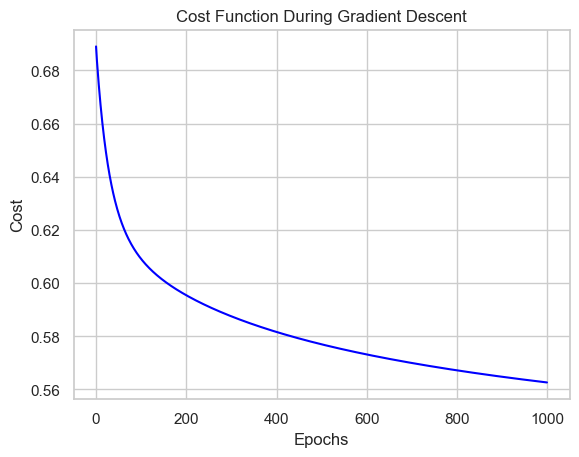

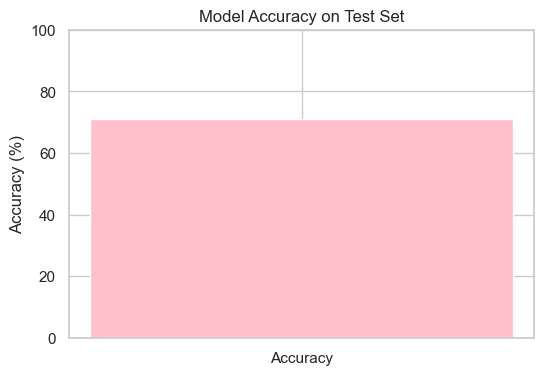

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


features = [
    'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex',
    'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth'
]
target = 'HeartDisease'


label_encoders = {col: LabelEncoder() for col in features + [target]}
for col in features + [target]:
    data[col] = label_encoders[col].fit_transform(data[col])


X = data[features].values
y = data[target].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))  # Shape: (m, n_features + 1)
X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))  # Shape: (m, n_features + 1)

# Initialize weights (1 weight per feature, including the bias term)
n_features = X_train.shape[1]  # This should be 11 (10 features + 1 bias)
weights = np.zeros(n_features)  # Length of weights is 11 (matching X_train's features)
learning_rate = 0.02
n_epochs = 1000


def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def cost_function(X, y, weights):
    m = len(y)
    predictions = sigmoid(np.dot(X, weights))
    cost = -(1 / m) * (np.dot(y, np.log(predictions)) + np.dot((1 - y), np.log(1 - predictions)))
    return cost


def gradient_descent(X, y, weights, learning_rate, n_epochs):
    m = len(y)
    cost_history = []

    for epoch in range(n_epochs):
        predictions = sigmoid(np.dot(X, weights))
        error = predictions - y
        gradient = (1 / m) * np.dot(X.T, error)  
        weights -= learning_rate * gradient  
        cost = cost_function(X, y, weights)
        cost_history.append(cost)

        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Cost: {cost:.4f}")

    return weights, cost_history

# Train model
weights, cost_history = gradient_descent(X_train, y_train, weights, learning_rate, n_epochs)


def predict(X, weights):
    probabilities = sigmoid(np.dot(X, weights))
    return [1 if prob >= 0.5 else 0 for prob in probabilities]

# Evaluate model
y_pred = predict(X_test, weights)


accuracy = np.mean(y_pred == y_test) * 100
print(f"Model Accuracy on Test Set: {accuracy:.2f}%")


plt.plot(range(n_epochs), cost_history, color='blue')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Cost Function During Gradient Descent')
plt.grid(True)
plt.show()


plt.figure(figsize=(6, 4))
plt.bar(['Accuracy'], [accuracy], color='pink')
plt.ylim(0, 100)
plt.title("Model Accuracy on Test Set")
plt.ylabel("Accuracy (%)")
plt.show()


# (2) Random Forest

Random Forest Accuracy: 75.71%



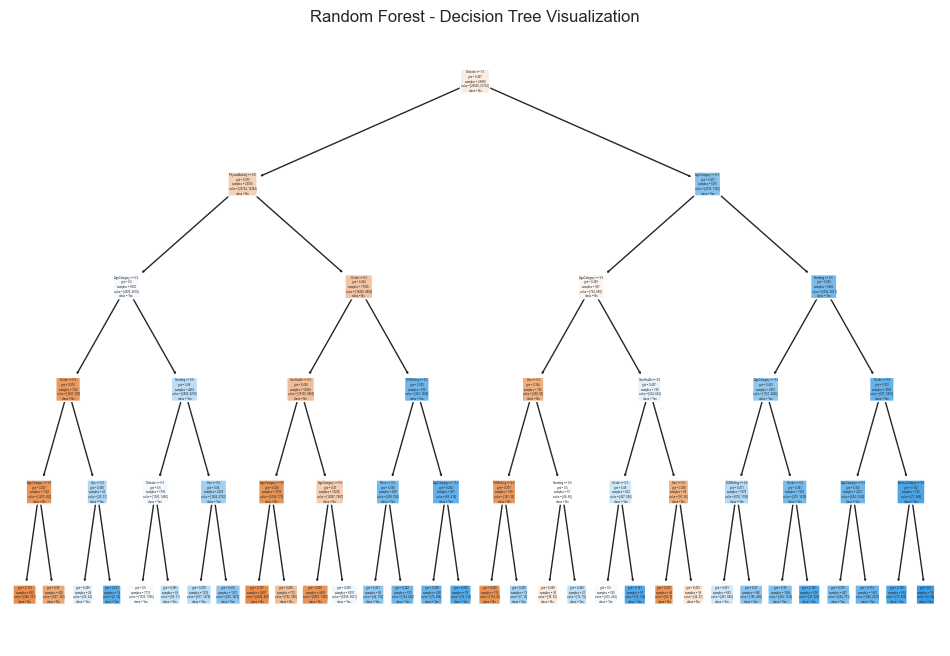

In [62]:
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import plot_tree


file_path = r'Multiple Disease Data.csv'
data = pd.read_csv(file_path)

selected_features = [
    'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex',
    'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth'
]
target = 'HeartDisease'


label_encoders = {col: LabelEncoder() for col in selected_features + [target]}
for col in selected_features + [target]:
    data[col] = label_encoders[col].fit_transform(data[col])


X = data[selected_features]
y = data[target]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create and train the Random Forest classifier
rf_clf = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=5, min_samples_split=10, min_samples_leaf=5)
rf_clf.fit(X_train, y_train)

# Evaluate  model
y_pred_rf = rf_clf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf * 100:.2f}%\n")

tree_to_plot = rf_clf.estimators_[0]


plt.figure(figsize=(12, 8))
plot_tree(tree_to_plot, feature_names=X.columns.tolist(), class_names=['No', 'Yes'], filled=True, rounded=True)
plt.title('Random Forest - Decision Tree Visualization')
plt.show()


# (3) KNN

KNN Accuracy: 72.02%



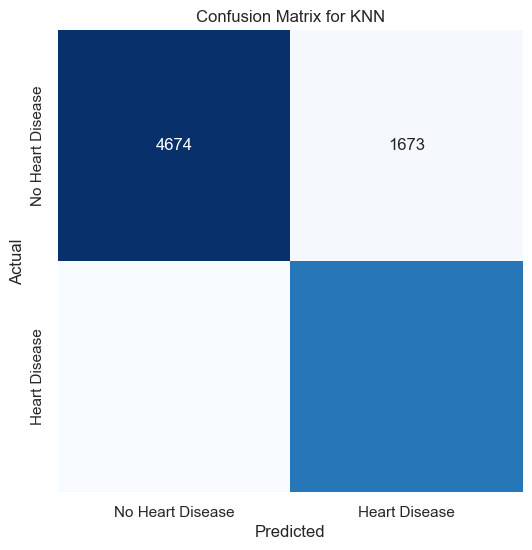

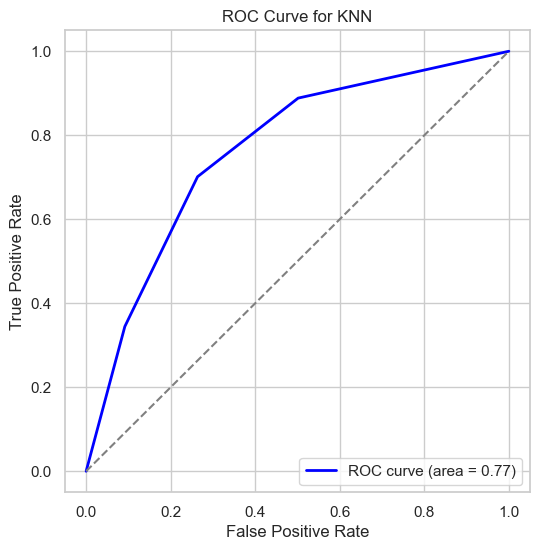

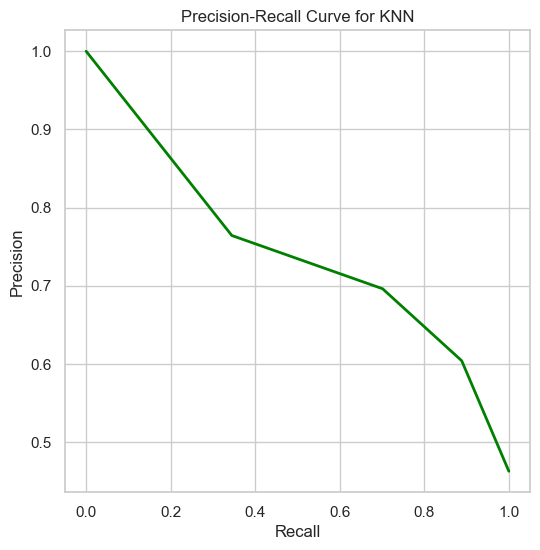

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd


file_path = r'Multiple Disease Data.csv'
data = pd.read_csv(file_path)


selected_features = [
    'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex',
    'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth'
]
target = 'HeartDisease'


label_encoders = {col: LabelEncoder() for col in selected_features + [target]}
for col in selected_features + [target]:
    data[col] = label_encoders[col].fit_transform(data[col])


X = data[selected_features]
y = data[target]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Evaluate model
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn * 100:.2f}%\n")

cm = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=["No Heart Disease", "Heart Disease"], 
            yticklabels=["No Heart Disease", "Heart Disease"])
plt.title("Confusion Matrix for KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# --- ROC Curve ---
fpr, tpr, _ = roc_curve(y_test, knn.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('ROC Curve for KNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# --- Precision-Recall Curve ---
precision, recall, _ = precision_recall_curve(y_test, knn.predict_proba(X_test)[:, 1])

plt.figure(figsize=(6, 6))
plt.plot(recall, precision, color='green', lw=2)
plt.title('Precision-Recall Curve for KNN')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()


# (4) Linear Regression

In [13]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score


file_path = r'Multiple Disease Data.csv'
data = pd.read_csv(file_path)

# Check for missing values
print("\nMissing values in the dataset:")
print(data.isnull().sum())

# Handle missing values ( fill with mean for numeric columns)
data['MentalHealth'].fillna(data['MentalHealth'].mean(), inplace=True)
data['GenHealth'].fillna(data['GenHealth'].mode()[0], inplace=True)

# Drop unnecessary columns ( last three columns)
data = data.iloc[:, :-3]


label_encoder = LabelEncoder()
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

# Set 'HeartDisease' as the target and drop it from features
y = data['HeartDisease']
X = data.drop(columns=['HeartDisease'])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print("\nLinear Regression Results:")
print("Mean Squared Error (MSE):", mse)
print("R-squared Score:", r2)


print("\nSample Predictions:")
for i in range(10):  
    print(f"Actual: {y_test.iloc[i]}, Predicted: {y_pred[i]:.2f}")



Missing values in the dataset:
HeartDisease         0
BMI                  0
Smoking              0
AlcoholDrinking      0
Stroke               0
PhysicalHealth       0
MentalHealth        28
DiffWalking          0
Sex                  0
AgeCategory          0
Race                 0
Diabetic             0
PhysicalActivity     0
GenHealth            9
SleepTime            0
Asthma               0
KidneyDisease        0
SkinCancer           0
dtype: int64

Linear Regression Results:
Mean Squared Error (MSE): 0.1728615096454034
R-squared Score: 0.3046961048797414

Sample Predictions:
Actual: 1, Predicted: 1.06
Actual: 0, Predicted: 0.37
Actual: 1, Predicted: 0.84
Actual: 1, Predicted: 0.53
Actual: 0, Predicted: 0.49
Actual: 0, Predicted: 0.35
Actual: 0, Predicted: 0.05
Actual: 0, Predicted: 0.12
Actual: 1, Predicted: 0.79
Actual: 0, Predicted: -0.04


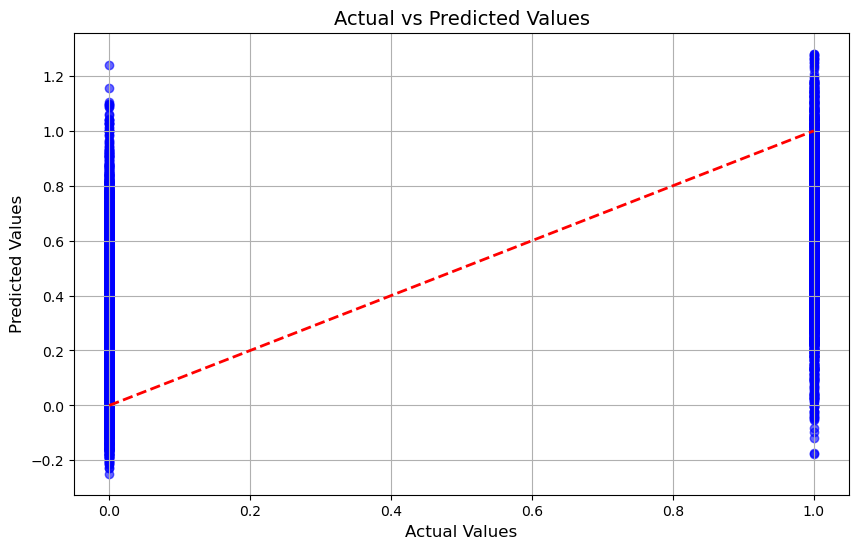

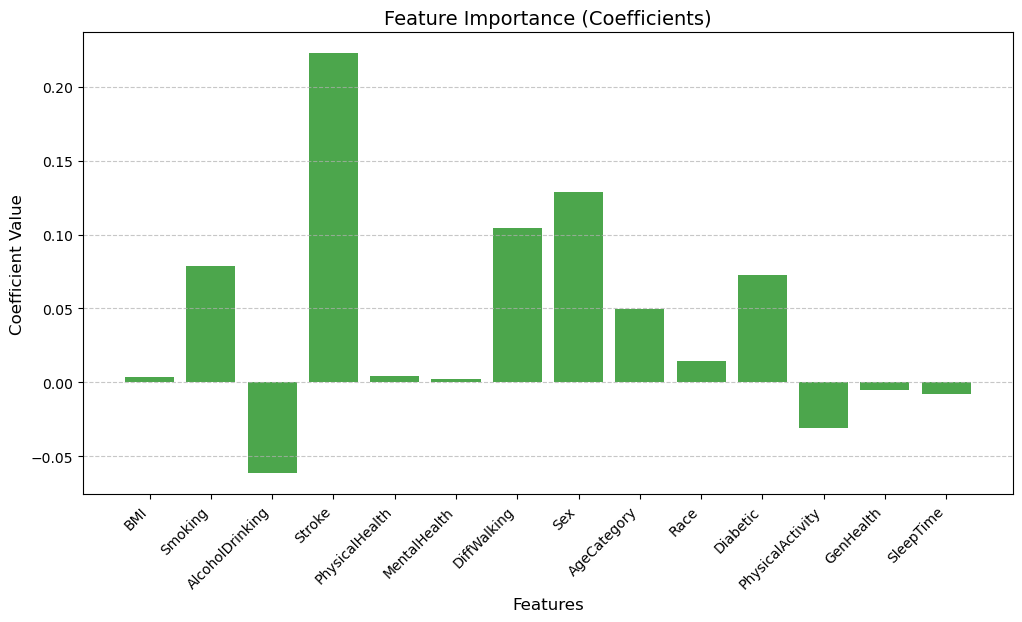

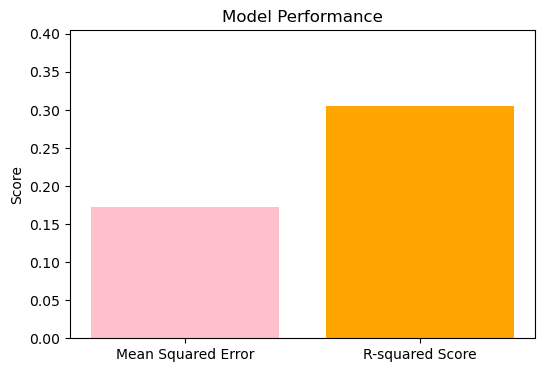

In [14]:

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', linewidth=2)
plt.title("Actual vs Predicted Values", fontsize=14)
plt.xlabel("Actual Values", fontsize=12)
plt.ylabel("Predicted Values", fontsize=12)
plt.grid(True)
plt.show()

# Visualization: Feature importance (coefficients)
features = X.columns
coefficients = model.coef_

plt.figure(figsize=(12, 6))
plt.bar(features, coefficients, color='green', alpha=0.7)
plt.title("Feature Importance (Coefficients)", fontsize=14)
plt.xlabel("Features", fontsize=12)
plt.ylabel("Coefficient Value", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# 3. Model Performance (MSE and R^2)
plt.figure(figsize=(6, 4))
metrics = ['Mean Squared Error', 'R-squared Score']
values = [mse, r2]
plt.bar(metrics, values, color=['pink', 'orange'])
plt.title("Model Performance")
plt.ylabel("Score")
plt.ylim(0, max(values) + 0.1)
plt.show()


# (5) Svm

Accuracy after PCA: 72.55%


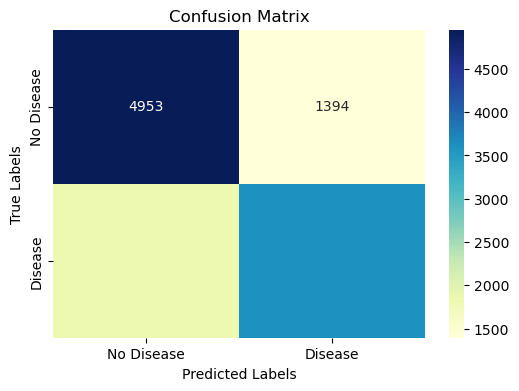

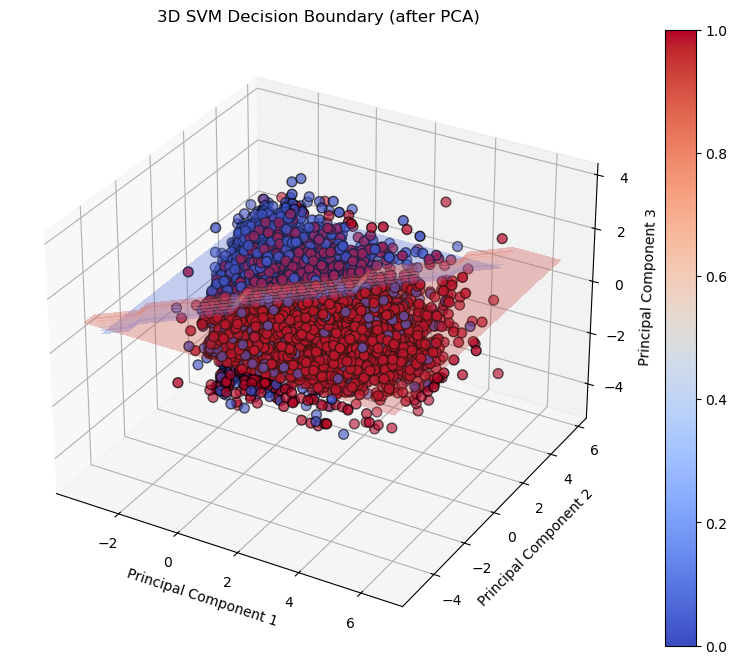

In [11]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import matplotlib.pyplot as plt


file_path = r'Multiple Disease Data.csv'  
data = pd.read_csv(file_path)


data['MentalHealth'].fillna(data['MentalHealth'].mean(), inplace=True)
data['GenHealth'].fillna(data['GenHealth'].mode()[0], inplace=True)


data = data.iloc[:, :-3]


label_encoder = LabelEncoder()
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])


y = data['HeartDisease']
X = data.drop(columns=['HeartDisease'])

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply PCA to reduce to 3 dimensions
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train model with PCA-transformed data
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train_pca, y_train)


y_pred = svm.predict(X_test_pca)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy after PCA: {accuracy * 100:.2f}%")


# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# 3D Visualization 
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(
    X_test_pca[:, 0], X_test_pca[:, 1], X_test_pca[:, 2], 
    c=y_test, cmap='coolwarm', edgecolor='k', s=50
)

# Create a meshgrid 
x_min, x_max = X_test_pca[:, 0].min() - 1, X_test_pca[:, 0].max() + 1
y_min, y_max = X_test_pca[:, 1].min() - 1, X_test_pca[:, 1].max() + 1
z_min, z_max = X_test_pca[:, 2].min() - 1, X_test_pca[:, 2].max() + 1

xx, yy, zz = np.meshgrid(
    np.arange(x_min, x_max, 0.5),
    np.arange(y_min, y_max, 0.5),
    np.arange(z_min, z_max, 0.5)
)

# Flatten grid and predict
grid = np.c_[xx.ravel(), yy.ravel(), zz.ravel()]
Z = svm.predict(grid)
Z = Z.reshape(xx.shape)

# Plot decision boundary 
ax.contourf(xx[:, :, 0], yy[:, :, 0], Z[:, :, 0], alpha=0.3, cmap='coolwarm')


ax.set_title("3D SVM Decision Boundary (after PCA)")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
plt.colorbar(scatter)
plt.show()


# (6) Ann ( Artificial Neural Network )

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


file_path = r'Multiple Disease Data.csv'
data = pd.read_csv(file_path)


data['MentalHealth'].fillna(data['MentalHealth'].mean(), inplace=True)
data['GenHealth'].fillna(data['GenHealth'].mode()[0], inplace=True)


data = data.iloc[:, :-3]


label_encoder = LabelEncoder()
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])


y = data['HeartDisease']
X = data.drop(columns=['HeartDisease'])


scaler = StandardScaler()
X = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Build and compile the ANN model ---
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # Input layer
model.add(Dense(32, activation='relu'))  # Hidden layer 1
model.add(Dense(16, activation='relu'))  # Hidden layer 2
model.add(Dense(1, activation='sigmoid'))  # Output layer (binary classification)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



C:\Users\MASHALLAH\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [3]:

# Train model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, verbose=1)

#Evaluate model
y_pred_prob = model.predict(X_test)
y_pred = [1 if prob >= 0.5 else 0 for prob in y_pred_prob]


accuracy = accuracy_score(y_test, y_pred)
print("\nANN Model Accuracy:", accuracy)



Epoch 1/50
1477/1477 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7338 - loss: 0.5317 - val_accuracy: 0.7630 - val_loss: 0.4957
Epoch 2/50
1477/1477 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7583 - loss: 0.4969 - val_accuracy: 0.7637 - val_loss: 0.4941
Epoch 3/50
1477/1477 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7588 - loss: 0.4945 - val_accuracy: 0.7643 - val_loss: 0.4924
Epoch 4/50
1477/1477 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7560 - loss: 0.4966 - val_accuracy: 0.7616 - val_loss: 0.4954
Epoch 5/50
1477/1477 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7643 - loss: 0.4889 - val_accuracy: 0.7639 - val_loss: 0.4941
Epoch 6/50
1477/1477 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7638 - loss: 0.4889 - val_accuracy: 0.7638 - val_loss: 0.4940
Epoch 7/50
1477/1477 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7610 - loss: 0.4937 - val_accuracy: 0.7648 - val_loss: 0.4914
Epoch 8/50
1477/1477 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7617 - loss: 0

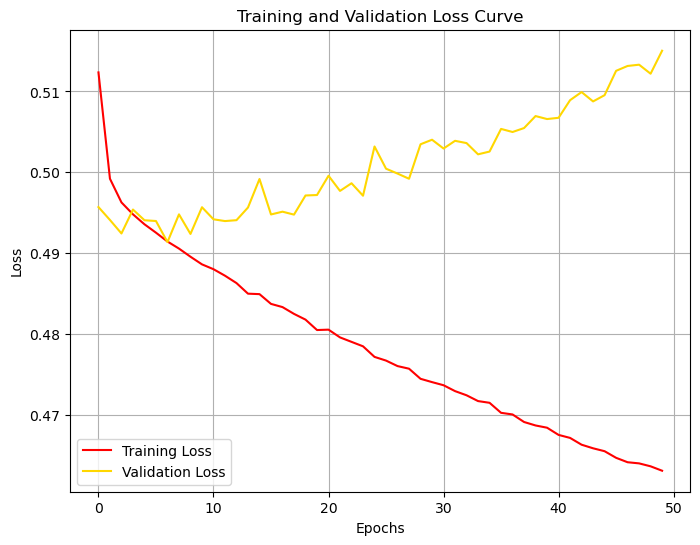

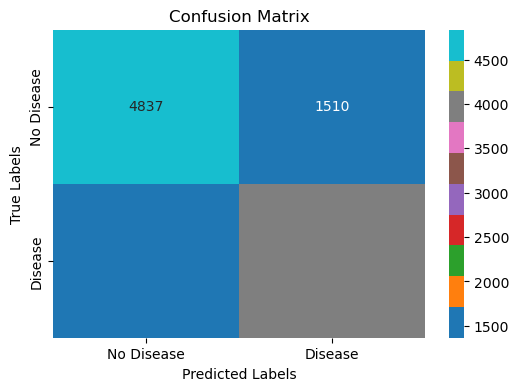

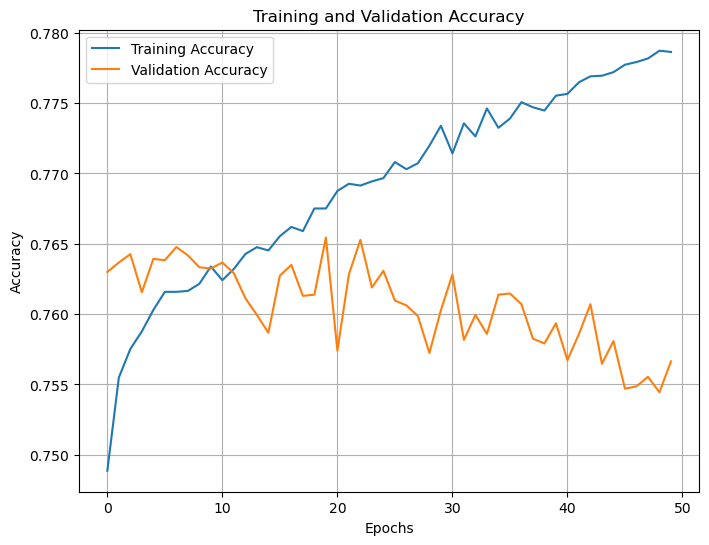

In [22]:

plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss',color='red')
plt.plot(history.history['val_loss'], label='Validation Loss',color='Gold')
plt.title('Training and Validation Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


# 2. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='tab10', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


# 3. Accuracy Plot
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()
